In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

Using TensorFlow backend.


In [0]:
odf = pd.read_csv('https://s3.amazonaws.com/petroski-personal-courses/python-stat-course/all-data-w-proc.csv.tar.gz',
                 sep=',', compression='gzip',dtype=str )
odf.columns = ['NUPROCESSO','DTTRAMITACAO','CDASSUNTO','CDSETORRESP','CDSETORORIGEM',
              'CDUSUARIO','CDSETORDESTINO']

In [3]:
df = odf.sample(frac=0.1)
df.head()

,NUPROCESSO,DTTRAMITACAO,CDASSUNTO,CDSETORRESP,CDSETORORIGEM,CDUSUARIO,CDSETORDESTINO
707487,2014/00048752,2014-05-05 14:29:08.227,491,5877,8662,305284,5877
338945,2008/00058465,2008-07-31 09:53:01.53,530,524,516,807636,524
1326484,2013/00150672,2013-09-30 13:58:15.173,112,8552,8552,028579,8571
1931342,2011/00015297,2011-02-14 18:33:52.787,278,9059,9085,355954,9098
1114479,2010/00009207,2010-08-17 18:14:25.847,170,8555,8555,089492,8563


In [4]:
cols = ['CDSETORRESP', 'CDSETORORIGEM', 'CDUSUARIO', 'CDASSUNTO']
x = pd.get_dummies(df[cols], columns=cols)
y = pd.get_dummies(df[['CDSETORDESTINO']], columns=['CDSETORDESTINO'])
x.head()

,CDSETORRESP_10034,CDSETORRESP_10035,CDSETORRESP_10036,CDSETORRESP_10037,CDSETORRESP_10041,CDSETORRESP_10045,CDSETORRESP_10051,CDSETORRESP_10054,CDSETORRESP_10055,CDSETORRESP_10059,...,CDASSUNTO_989,CDASSUNTO_99,CDASSUNTO_990,CDASSUNTO_991,CDASSUNTO_992,CDASSUNTO_993,CDASSUNTO_994,CDASSUNTO_995,CDASSUNTO_998,CDASSUNTO_999
707487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
338945,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1326484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1931342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1114479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y.head()

,CDSETORDESTINO_10026,CDSETORDESTINO_10027,CDSETORDESTINO_10028,CDSETORDESTINO_10029,CDSETORDESTINO_10030,CDSETORDESTINO_10031,CDSETORDESTINO_10032,CDSETORDESTINO_10034,CDSETORDESTINO_10035,CDSETORDESTINO_10036,...,CDSETORDESTINO_9954,CDSETORDESTINO_9955,CDSETORDESTINO_9956,CDSETORDESTINO_9957,CDSETORDESTINO_9958,CDSETORDESTINO_9959,CDSETORDESTINO_9962,CDSETORDESTINO_9963,CDSETORDESTINO_9964,CDSETORDESTINO_9965
1442805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1557437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2457557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1170434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
876995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
num_classes = df['CDSETORDESTINO'].nunique()
print(num_classes)
input_size = x.shape[1]
print(input_size)


1356
4923


In [0]:
def baseline_model():
    model = Sequential()
    model.add(Dense(24, input_dim=input_size, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

/usr/local/lib/python3.6/dist-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 246621 samples, validate on 61656 samples
Epoch 1/5
 22030/246621 [=>............................] - ETA: 6:08 - loss: 3.9988 - acc: 0.2597

246620/246621 [============================>.] - ETA: 0s - loss: 2.0326 - acc: 0.5545

246621/246621 [==============================] - 439s 2ms/step - loss: 2.0326 - acc: 0.5545 - val_loss: 1.5947 - val_acc: 0.6179
Epoch 2/5
 13935/246621 [>.............................] - ETA: 6:36 - loss: 1.5103 - acc: 0.6291

246610/246621 [============================>.] - ETA: 0s - loss: 1.4994 - acc: 0.6304

246621/246621 [==============================] - 442s 2ms/step - loss: 1.4994 - acc: 0.6304 - val_loss: 1.5356 - val_acc: 0.6236
Epoch 3/5
 14090/246621 [>.............................] - ETA: 6:30 - loss: 1.3780 - acc: 0.6562

246610/246621 [============================>.] - ETA: 0s - loss: 1.4456 - acc: 0.6390

246621/246621 [==============================] - 443s 2ms/step - loss: 1.4457 - acc: 0.6390 - val_loss: 1.5305 - val_acc: 0.6305
Epoch 4/5
 13555/246621 [>.............................] - ETA: 6:50 - loss: 1.3652 - acc: 0.6521

246595/246621 [============================>.] - ETA: 0s - loss: 1.4331 - acc: 0.6423

246621/246621 [==============================] - 449s 2ms/step - loss: 1.4330 - acc: 0.6423 - val_loss: 1.5412 - val_acc: 0.6288
Epoch 5/5
 14040/246621 [>.............................] - ETA: 6:31 - loss: 1.3684 - acc: 0.6511

246600/246621 [============================>.] - ETA: 0s - loss: 1.4322 - acc: 0.6438

61656/61656 [==============================] - 14s 233us/step


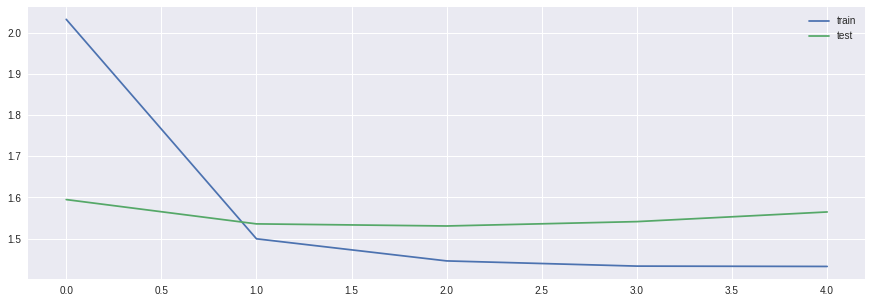

In [8]:
model = baseline_model()
history = model.fit(x_train, y_train,
                    batch_size=5, nb_epoch=5,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1, batch_size=None)
_ = pd.DataFrame([history.history['loss'],
                  history.history['val_loss']],
                 index=['train', 'test']).T.plot(figsize=(15, 5))

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, KFold

In [10]:
estimator = KerasClassifier(build_fn=baseline_model,
                            epochs=5,
                            batch_size=5,
                            verbose=1)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, x, y, cv=kfold)
print("MLP: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/5
246610/246621 [============================>.] - ETA: 0s - loss: 2.0339 - acc: 0.5535

246621/246621 [==============================] - 479s 2ms/step - loss: 2.0339 - acc: 0.5535
Epoch 2/5
 14490/246621 [>.............................] - ETA: 7:40 - loss: 1.5291 - acc: 0.6256

117615/246621 [=============>................] - ETA: 4:16 - loss: 1.5116 - acc: 0.6274

246621/246621 [==============================] - 493s 2ms/step - loss: 1.5006 - acc: 0.6292


Epoch 3/5
146690/246621 [================>.............] - ETA: 3:16 - loss: 1.4416 - acc: 0.6372

246621/246621 [==============================] - 488s 2ms/step - loss: 1.4472 - acc: 0.6381


Epoch 4/5
246610/246621 [============================>.] - ETA: 0s - loss: 1.4335 - acc: 0.6419

246621/246621 [==============================] - 495s 2ms/step - loss: 1.4335 - acc: 0.6419
Epoch 5/5
 14305/246621 [>.............................] - ETA: 7:47 - loss: 1.4045 - acc: 0.6497

246621/246621 [==============================] - 480s 2ms/step - loss: 1.4354 - acc: 0.6431


61656/61656 [==============================] - 27s 438us/step
Epoch 1/5
 12090/246621 [>.............................] - ETA: 7:52 - loss: 4.5728 - acc: 0.1580

144825/246621 [================>.............] - ETA: 3:25 - loss: 2.3167 - acc: 0.5138

246621/246621 [==============================] - 491s 2ms/step - loss: 2.0367 - acc: 0.5538


Epoch 2/5
246615/246621 [============================>.] - ETA: 0s - loss: 1.4953 - acc: 0.6294

246621/246621 [==============================] - 495s 2ms/step - loss: 1.4953 - acc: 0.6294
Epoch 3/5
 14170/246621 [>.............................] - ETA: 7:50 - loss: 1.4290 - acc: 0.6354

125365/246621 [==============>...............] - ETA: 4:05 - loss: 1.4357 - acc: 0.6385

246621/246621 [==============================] - 492s 2ms/step - loss: 1.4405 - acc: 0.6386


Epoch 4/5
246595/246621 [============================>.] - ETA: 0s - loss: 1.4274 - acc: 0.6423

246621/246621 [==============================] - 490s 2ms/step - loss: 1.4275 - acc: 0.6423
Epoch 5/5
 14580/246621 [>.............................] - ETA: 7:41 - loss: 1.4163 - acc: 0.6492

246621/246621 [==============================] - 484s 2ms/step - loss: 1.4263 - acc: 0.6435


61656/61656 [==============================] - 29s 475us/step
Epoch 1/5
 12300/246622 [>.............................] - ETA: 7:32 - loss: 4.5757 - acc: 0.1641

246622/246622 [==============================] - 470s 2ms/step - loss: 2.0331 - acc: 0.5551


Epoch 2/5
205420/246622 [=======================>......] - ETA: 1:17 - loss: 1.5072 - acc: 0.6285

246622/246622 [==============================] - 464s 2ms/step - loss: 1.4970 - acc: 0.6299


Epoch 3/5
246610/246622 [============================>.] - ETA: 0s - loss: 1.4388 - acc: 0.6396

246622/246622 [==============================] - 490s 2ms/step - loss: 1.4388 - acc: 0.6396
Epoch 4/5
 14355/246622 [>.............................] - ETA: 7:46 - loss: 1.3843 - acc: 0.6532

246622/246622 [==============================] - 486s 2ms/step - loss: 1.4241 - acc: 0.6438


Epoch 5/5
246620/246622 [============================>.] - ETA: 0s - loss: 1.4245 - acc: 0.6449

61655/61655 [==============================] - 29s 467us/step
Epoch 1/5
  1865/246622 [..............................] - ETA: 8:15 - loss: 5.9552 - acc: 0.0504

246622/246622 [==============================] - 467s 2ms/step - loss: 2.0368 - acc: 0.5531


Epoch 2/5
246620/246622 [============================>.] - ETA: 0s - loss: 1.5040 - acc: 0.6282

246622/246622 [==============================] - 455s 2ms/step - loss: 1.5040 - acc: 0.6282
Epoch 3/5
 15535/246622 [>.............................] - ETA: 7:07 - loss: 1.3874 - acc: 0.6478

246622/246622 [==============================] - 455s 2ms/step - loss: 1.4484 - acc: 0.6379


Epoch 4/5
246595/246622 [============================>.] - ETA: 0s - loss: 1.4331 - acc: 0.6416

246622/246622 [==============================] - 447s 2ms/step - loss: 1.4332 - acc: 0.6416
Epoch 5/5
 10575/246622 [>.............................] - ETA: 7:19 - loss: 1.4217 - acc: 0.6391

246622/246622 [==============================] - 451s 2ms/step - loss: 1.4319 - acc: 0.6430


61655/61655 [==============================] - 28s 452us/step
Epoch 1/5
 12845/246622 [>.............................] - ETA: 7:20 - loss: 4.5426 - acc: 0.1643

246622/246622 [==============================] - 450s 2ms/step - loss: 2.0289 - acc: 0.5536


Epoch 2/5
246600/246622 [============================>.] - ETA: 0s - loss: 1.4871 - acc: 0.6302

246622/246622 [==============================] - 452s 2ms/step - loss: 1.4871 - acc: 0.6302
Epoch 3/5
  9815/246622 [>.............................] - ETA: 7:55 - loss: 1.4493 - acc: 0.6354

246622/246622 [==============================] - 499s 2ms/step - loss: 1.4335 - acc: 0.6396


Epoch 4/5
246605/246622 [============================>.] - ETA: 0s - loss: 1.4188 - acc: 0.6423

246622/246622 [==============================] - 503s 2ms/step - loss: 1.4187 - acc: 0.6423
Epoch 5/5
  9490/246622 [>.............................] - ETA: 8:07 - loss: 1.3784 - acc: 0.6486

246622/246622 [==============================] - 502s 2ms/step - loss: 1.4170 - acc: 0.6441


61655/61655 [==============================] - 34s 559us/step
MLP: 62.84% (0.19%)
